In [2]:
from bayesian_optimization import BayesianOptimization
import pandas as pd 
from botorch.test_functions import Levy 
import numpy as np 
import GPy
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('code')
import function as varsel

N_INITIAL = 100
EPOCHS = 10
BATCH_SIZE = 10
DIM = 2
LOWER = -10
UPPER = 10
NUM_RUNS = 10


rel_ARD_values = np.zeros((NUM_RUNS, DIM))
rel_KLD_values = np.zeros((NUM_RUNS, DIM))
rel_VAR_values = np.zeros((NUM_RUNS, DIM))

for i in range(NUM_RUNS):
    optimizer = BayesianOptimization(fun=Levy(dim=DIM, negate=True), 
                                     batch_size=BATCH_SIZE, 
                                     dim=DIM, 
                                     epochs=EPOCHS, 
                                     n_init=N_INITIAL, 
                                     lower_bound=LOWER,
                                     upper_bound=UPPER,
                                     seed=i,  
                                     acqf_type='qUCB')

    x_max, y_max, lengthscales = optimizer.run()
    data = optimizer.get_data()
    x=data[:,:2].numpy()
    y=data[:,-1:].numpy()
    # ARD values 
    rel_ARD = np.zeros(DIM)
    rel_ARD += 1 / lengthscales    
    rel_ARD_values[i, :] = rel_ARD
    # Now getting the VAR and KLD values 
    rel_ARD = np.zeros(DIM)
    rel_KL = np.zeros(DIM)
    rel_VAR = np.zeros(DIM)

    delta = 0.0001 # Parameters for t
    nquadr = 11

    kernel = GPy.kern.RBF(input_dim=DIM,ARD=True) + GPy.kern.Bias(input_dim=DIM)
    model = GPy.models.GPRegression(x,y,kernel)
    model.optimize()
    rel_KL = rel_KL + varsel.KLrel(x,model,delta)    
    rel_VAR = rel_VAR + varsel.VARrel(x,model,nquadr)
    rel_VAR_values[i, :] = rel_VAR
    rel_KLD_values[i, :] = rel_KL

rel_ARD_mean = np.mean(rel_ARD_values, axis=0)
rel_ARD_std = np.std(rel_ARD_values, axis=0)

rel_VAR_mean = np.mean(rel_VAR_values, axis=0)
rel_VAR_std = np.std(rel_VAR_values, axis=0)

rel_KLD_mean = np.mean(rel_KLD_values, axis=0)
rel_KLD_std = np.std(rel_KLD_values, axis=0)

print("Mean of rel_ARD values:", rel_ARD_mean)
print("Standard deviation of rel_ARD values:", rel_ARD_std)

print("Mean of rel_KLD values:", rel_KLD_mean)
print("Standard deviation of rel_KLD values:", rel_KLD_std)

print("Mean of rel_VAR values:", rel_VAR_mean)
print("Standard deviation of rel_VAR values:", rel_VAR_std)


Lengthscales of the kernel:  [0.12696805 1.22122128]
Lengthscales of the kernel:  [0.10336444 1.26336952]
Lengthscales of the kernel:  [0.12224085 1.34266588]
Lengthscales of the kernel:  [0.13140496 1.56186056]
Lengthscales of the kernel:  [0.1159672  1.44263423]
Lengthscales of the kernel:  [0.12043647 1.31482241]
Lengthscales of the kernel:  [0.13009588 1.45895636]
Lengthscales of the kernel:  [0.10997504 1.31407436]
Lengthscales of the kernel:  [0.12774413 1.26002973]
Lengthscales of the kernel:  [0.13522482 1.67731457]
Mean of rel_ARD values: [8.22702507 0.72854074]
Standard deviation of rel_ARD values: [0.68242305 0.06864612]
Mean of rel_KLD values: [7.50448346 0.59220484]
Standard deviation of rel_KLD values: [0.53022808 0.04557809]
Mean of rel_VAR values: [533.20636642  16.67776971]
Standard deviation of rel_VAR values: [103.13056718   2.07023385]


In [1]:
from bayesian_optimization import BayesianOptimization
import pandas as pd 
from botorch.test_functions import Ackley 
import numpy as np 
import GPy
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('code')
import function as varsel

N_INITIAL = 100
EPOCHS = 10
BATCH_SIZE = 10
DIM = 2
LOWER = -32.768
UPPER = 32.768
NUM_RUNS = 10


rel_ARD_values = np.zeros((NUM_RUNS, DIM))
rel_KLD_values = np.zeros((NUM_RUNS, DIM))
rel_VAR_values = np.zeros((NUM_RUNS, DIM))

for i in range(NUM_RUNS):
    optimizer = BayesianOptimization(fun=Ackley(dim=DIM, negate=True), 
                                     batch_size=BATCH_SIZE, 
                                     dim=DIM, 
                                     epochs=EPOCHS, 
                                     n_init=N_INITIAL, 
                                     lower_bound=LOWER,
                                     upper_bound=UPPER,
                                     seed=i,  
                                     acqf_type='qUCB')

    x_max, y_max, lengthscales = optimizer.run()
    data = optimizer.get_data()
    x=data[:,:2].numpy()
    y=data[:,-1:].numpy()
    # ARD values 
    rel_ARD = np.zeros(DIM)
    rel_ARD += 1 / lengthscales    
    rel_ARD_values[i, :] = rel_ARD
    # Now getting the VAR and KLD values 
    rel_ARD = np.zeros(DIM)
    rel_KL = np.zeros(DIM)
    rel_VAR = np.zeros(DIM)

    delta = 0.0001 # Parameters for t
    nquadr = 11

    kernel = GPy.kern.RBF(input_dim=DIM,ARD=True) + GPy.kern.Bias(input_dim=DIM)
    model = GPy.models.GPRegression(x,y,kernel)
    model.optimize()
    rel_KL = rel_KL + varsel.KLrel(x,model,delta)    
    rel_VAR = rel_VAR + varsel.VARrel(x,model,nquadr)
    rel_VAR_values[i, :] = rel_VAR
    rel_KLD_values[i, :] = rel_KL

rel_ARD_mean = np.mean(rel_ARD_values, axis=0)
rel_ARD_std = np.std(rel_ARD_values, axis=0)

rel_VAR_mean = np.mean(rel_VAR_values, axis=0)
rel_VAR_std = np.std(rel_VAR_values, axis=0)

rel_KLD_mean = np.mean(rel_KLD_values, axis=0)
rel_KLD_std = np.std(rel_KLD_values, axis=0)

print("Mean of rel_ARD values:", rel_ARD_mean)
print("Standard deviation of rel_ARD values:", rel_ARD_std)

print("Mean of rel_KLD values:", rel_KLD_mean)
print("Standard deviation of rel_KLD values:", rel_KLD_std)

print("Mean of rel_VAR values:", rel_VAR_mean)
print("Standard deviation of rel_VAR values:", rel_VAR_std)

/Users/dylanschubert/anaconda3/envs/msc_project/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Lengthscales of the kernel:  [0.03051273 0.10191535]
Lengthscales of the kernel:  [0.04498962 0.03073385]
Lengthscales of the kernel:  [0.0578976  0.08932873]
Lengthscales of the kernel:  [0.08066744 0.03944858]
Lengthscales of the kernel:  [0.05638707 0.03470962]
Lengthscales of the kernel:  [0.04052743 0.08565754]
Lengthscales of the kernel:  [0.07484727 0.06340884]
Lengthscales of the kernel:  [0.05365315 0.05656848]
Lengthscales of the kernel:  [0.04317638 0.07104353]
Lengthscales of the kernel:  [0.0192876  0.10551009]
Mean of rel_ARD values: [23.40845684 17.6380401 ]
Standard deviation of rel_ARD values: [11.01963694  7.92071158]
Mean of rel_KLD values: [0.15991766 0.1781716 ]
Standard deviation of rel_KLD values: [0.02943926 0.02600257]
Mean of rel_VAR values: [11.1545477  12.26154235]
Standard deviation of rel_VAR values: [1.39416065 1.36510487]


## Non linear tests

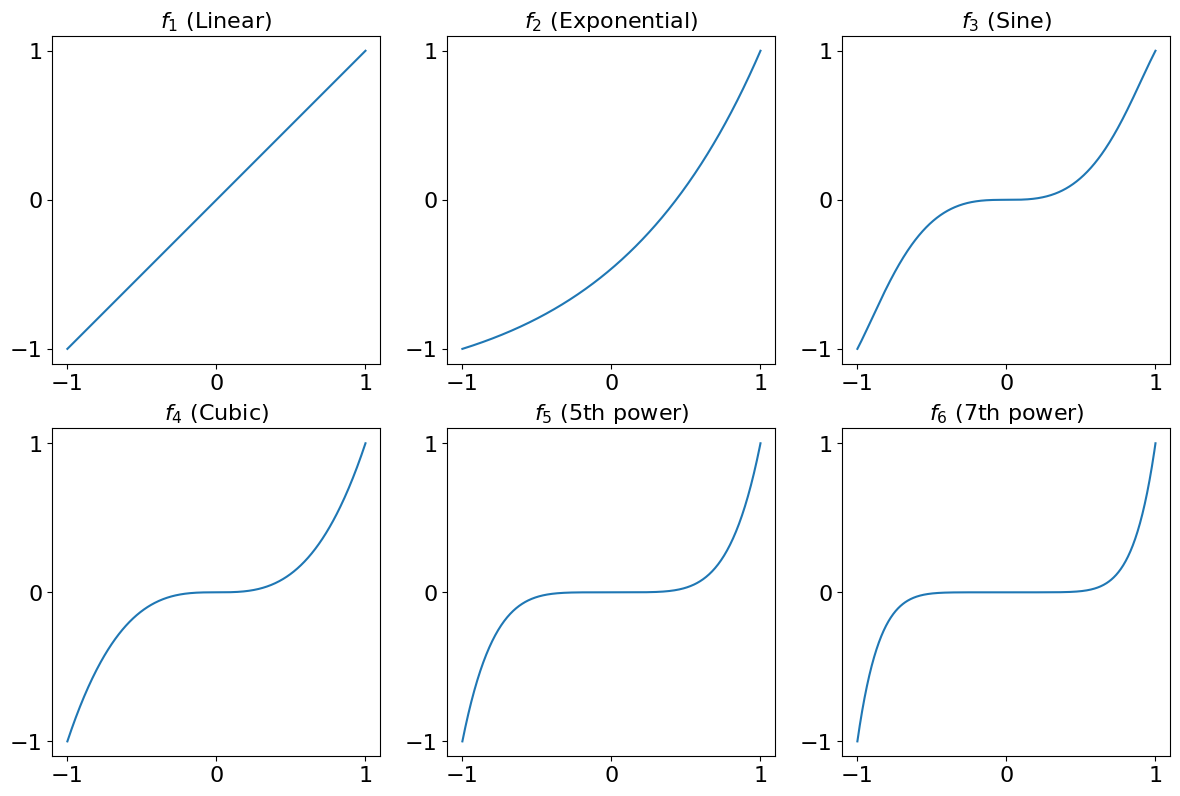

In [108]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_to_range(f):
    """Normalize function output to the range [-1, 1]."""
    f_min = np.min(f)
    f_max = np.max(f)
    return 2 * (f - f_min) / (f_max - f_min) - 1

def non_linear_function(x):
    # Define the non-linear functions
    f1 = x[:, 0]  # Linear
    f2 = np.exp(x[:, 1])  # Exponential
    f3 = np.sin(x[:, 2]**3)  # Sinusoidal
    f4 = x[:, 3]**3  # Cubic
    f5 = x[:, 4]**5  # 5th power
    f6 = x[:, 5]**7  # 7th power

    # Normalize each function to the range [-1, 1]
    f1_normalized = normalize_to_range(f1)
    f2_normalized = normalize_to_range(f2)
    f3_normalized = normalize_to_range(f3)
    f4_normalized = normalize_to_range(f4)
    f5_normalized = normalize_to_range(f5)
    f6_normalized = normalize_to_range(f6)

    return f1_normalized, f2_normalized, f3_normalized, f4_normalized, f5_normalized, f6_normalized

x = np.linspace(-1, 1, 500)
X = np.stack([x, x, x, x, x, x], axis=1)

f1_norm, f2_norm, f3_norm, f4_norm, f5_norm, f6_norm = non_linear_function(X)

plt.figure(figsize=(12, 8))

ticks = [-1, 0, 1]
font_size = 16  # Set the font size

# 2x3 grid
plt.subplot(2, 3, 1)
plt.plot(x, f1_norm)
plt.title(r'$f_1$ (Linear)', fontsize=font_size)
plt.xticks(ticks, fontsize=font_size)
plt.yticks(ticks, fontsize=font_size)
plt.gca().set_aspect('equal')

plt.subplot(2, 3, 2)
plt.plot(x, f2_norm)
plt.title(r'$f_2$ (Exponential)', fontsize=font_size)
plt.xticks(ticks, fontsize=font_size)
plt.yticks(ticks, fontsize=font_size)
plt.gca().set_aspect('equal')

plt.subplot(2, 3, 3)
plt.plot(x, f3_norm)
plt.title(r'$f_3$ (Sine)', fontsize=font_size)
plt.xticks(ticks, fontsize=font_size)
plt.yticks(ticks, fontsize=font_size)
plt.gca().set_aspect('equal')

plt.subplot(2, 3, 4)
plt.plot(x, f4_norm)
plt.title(r'$f_4$ (Cubic)', fontsize=font_size)
plt.xticks(ticks, fontsize=font_size)
plt.yticks(ticks, fontsize=font_size)
plt.gca().set_aspect('equal')

plt.subplot(2, 3, 5)
plt.plot(x, f5_norm)
plt.title(r'$f_5$ (5th power)', fontsize=font_size)
plt.xticks(ticks, fontsize=font_size)
plt.yticks(ticks, fontsize=font_size)
plt.gca().set_aspect('equal')

plt.subplot(2, 3, 6)
plt.plot(x, f6_norm)
plt.title(r'$f_6$ (7th power)', fontsize=font_size)
plt.xticks(ticks, fontsize=font_size)
plt.yticks(ticks, fontsize=font_size)
plt.gca().set_aspect('equal')

plt.tight_layout()
plt.show()

In [122]:
def non_linear_function(x):
    f1 = x[:, 0]  # Linear
    f2 = np.exp(x[:, 1])  # Exponential
    f3 = np.sin(x[:, 2])  # Sinusoidal
    f4 = x[:, 3]**3  # Quadratic
    f5 = x[:, 4]**5  # Cubic
    f6 = x[:, 5]**7  # Seventh power
    # Normalize each function to the range [-1, 1]
    f1_normalized = normalize_to_range(f1)
    f2_normalized = normalize_to_range(f2)
    f3_normalized = normalize_to_range(f3)
    f4_normalized = normalize_to_range(f4)
    f5_normalized = normalize_to_range(f5)
    f6_normalized = normalize_to_range(f6)

    return f1_normalized+f2_normalized+f3_normalized+f4_normalized+f5_normalized+f6_normalized

Starting repetition 1 / 5
[11.92051427 12.07553656 12.7693902  12.39575979 11.74949132 13.4669675 ]
Starting repetition 2 / 5
[8.05189793 7.58693581 8.57804053 7.61298525 7.17455864 6.00633931]
Starting repetition 3 / 5
[8.8879489  8.17082442 8.49391647 9.38183891 7.83803018 7.86702206]
Starting repetition 4 / 5
[13.54885457 12.94952364 14.51796275 13.82202788 11.52327949 13.23816455]
Starting repetition 5 / 5
[12.18463362 10.62384467 13.07944014 12.12990941 11.89774769 11.86903417]


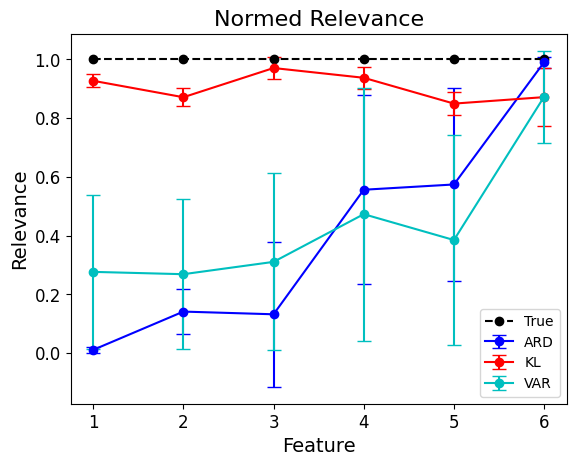

In [124]:
import GPy
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('code')
import function as varsel

np.random.seed(1)

# number of repetitions to average over
repeats = 5
# number of covariates
m = 6
# number of data points
n = 300
# Delta for KL method
delta = 0.0001
# number of quadrature points for VAR method
nquadr = 11

# Arrays to store normalized relevance values for each method and repetition
rel_ARD_nor_all = np.zeros((repeats, m))
rel_KL_nor_all = np.zeros((repeats, m))
rel_VAR_nor_all = np.zeros((repeats, m))

for i in range(0, repeats):
    x = np.random.uniform(-1., 1., (n, m))
    print('Starting repetition', i + 1, '/', repeats)

    y = non_linear_function(x)
    y = y.reshape(-1, 1)

    # RBF kernel plus constant term
    kernel = GPy.kern.RBF(input_dim=m, ARD=True) + GPy.kern.Bias(input_dim=m)
    model = GPy.models.GPRegression(x, y, kernel)
    model.optimize()

    # ARD relevance value is the inverse of the length scale
    rel_ARD = 1 / model.sum.rbf.lengthscale
    
    # KL relevance value
    rel_KL = varsel.KLrel(x, model, delta)
    print(rel_KL)
    # VAR relevance value
    rel_VAR = varsel.VARrel(x, model, nquadr)

    # Normalize the relevance values by their maximum in this repetition
    rel_ARD_nor_all[i, :] = rel_ARD / np.max(rel_ARD)
    rel_KL_nor_all[i, :] = rel_KL / np.max(rel_KL)
    rel_VAR_nor_all[i, :] = rel_VAR / np.max(rel_VAR)

# Compute the mean and standard deviation of the normalized values across the repetitions
rel_ARD_nor_mean = np.mean(rel_ARD_nor_all, axis=0)
rel_KL_nor_mean = np.mean(rel_KL_nor_all, axis=0)
rel_VAR_nor_mean = np.mean(rel_VAR_nor_all, axis=0)

rel_ARD_nor_std = np.std(rel_ARD_nor_all, axis=0)
rel_KL_nor_std = np.std(rel_KL_nor_all, axis=0)
rel_VAR_nor_std = np.std(rel_VAR_nor_all, axis=0)

# True relevance, the covariates are equally relevant in the L2 sense
rel_true = np.ones(m)

# Plot
covariates = np.arange(1, m+1)
fig, ax = plt.subplots()

# Plotting the error bars
ax.errorbar(covariates, rel_ARD_nor_mean, yerr=rel_ARD_nor_std, fmt='-ob', label='ARD', capsize=5)
ax.errorbar(covariates, rel_KL_nor_mean, yerr=rel_KL_nor_std, fmt='-or', label='KL', capsize=5)
ax.errorbar(covariates, rel_VAR_nor_mean, yerr=rel_VAR_nor_std, fmt='-oc', label='VAR', capsize=5)

# Plotting the true relevance
ax.plot(covariates, rel_true, '--ok', label='True')

# Adding the legend
ax.legend()

ax.set_ylabel('Relevance', fontsize=14)
ax.set_xlabel('Feature', fontsize=14)
ax.set_title('Normed Relevance', fontsize=16)

# Increasing the font size of the tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()